<a href="https://colab.research.google.com/github/ywsyws/CUTIE/blob/main/CUTIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using CUTIE approach to detect total amount TTC on receipt documents

# 0. Preparation
## 0.1 Environment Setting

In [1]:
# # Install necessary libraries
# !sudo apt install tesseract-ocr
# !pip3 install pytesseract

In [2]:
# # Mount Google Drive to Colab
# from google.colab import drive
# drive.mount('/content/gdrive')

In [22]:
# Import libraries
from IPython.display import Image, display
import pytesseract

import json
import os
from os.path import basename, split
import re

In [4]:
# Set root path for this project
root_path = r'/content/gdrive/MyDrive/Colab Notebooks/CUTIE/'
# Change working directory
os.chdir(root_path)

## 0.1 Capture texts on images
Stores texts and related information in json format for model training

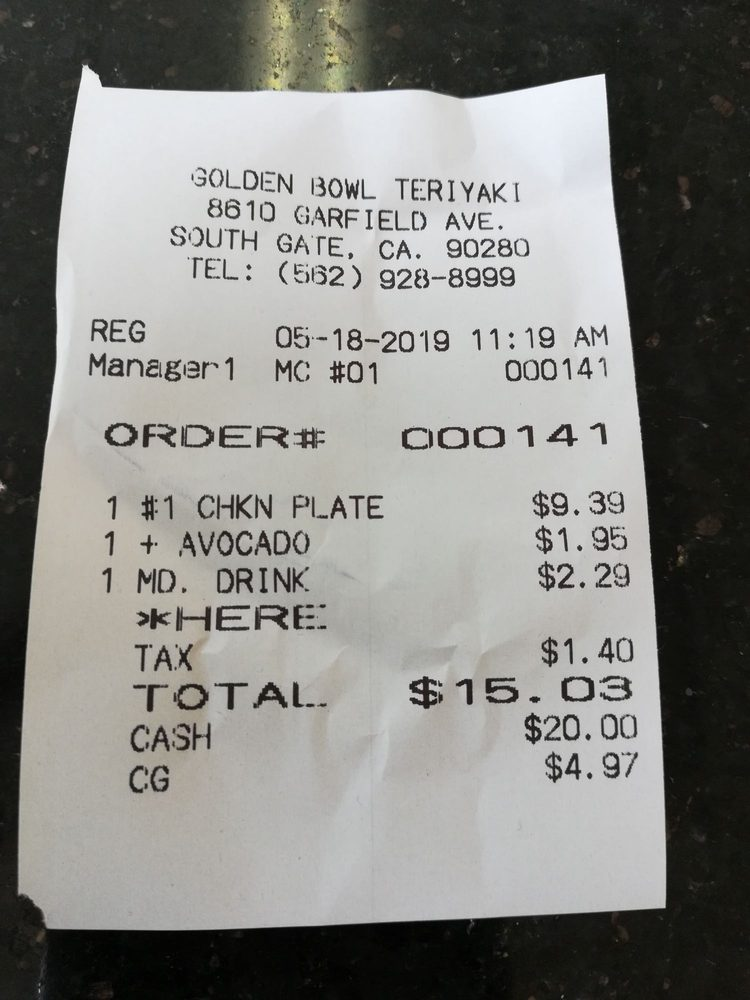

In [5]:
# Display an image
image_name='ExpressExpenseImage/1004-receipt.jpg'
Image(filename=image_name)

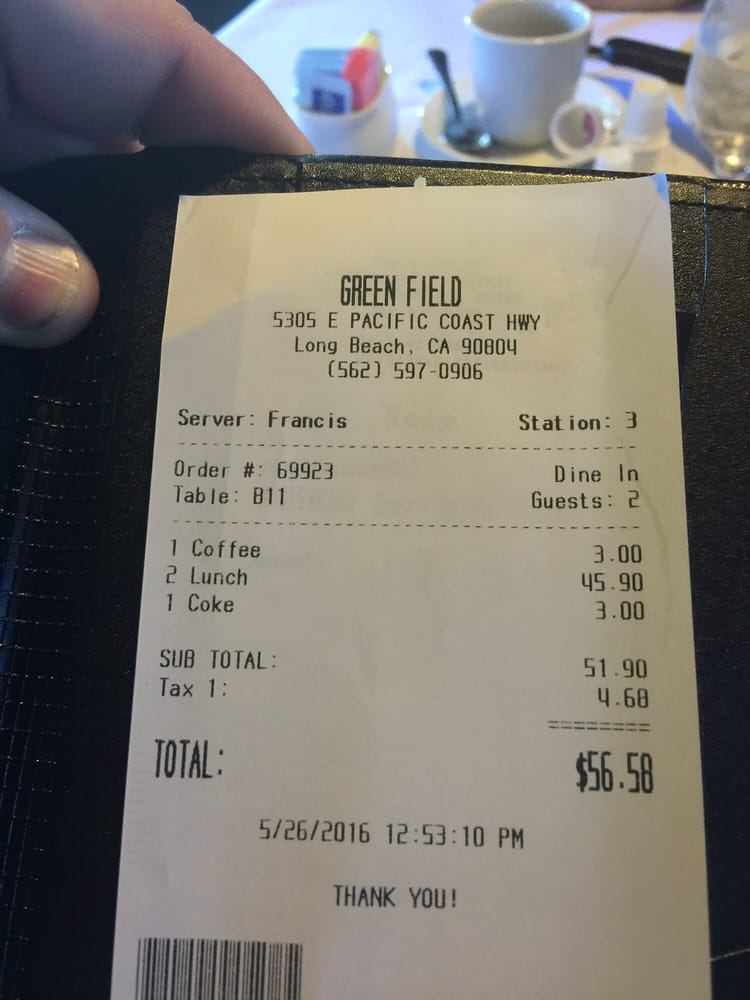

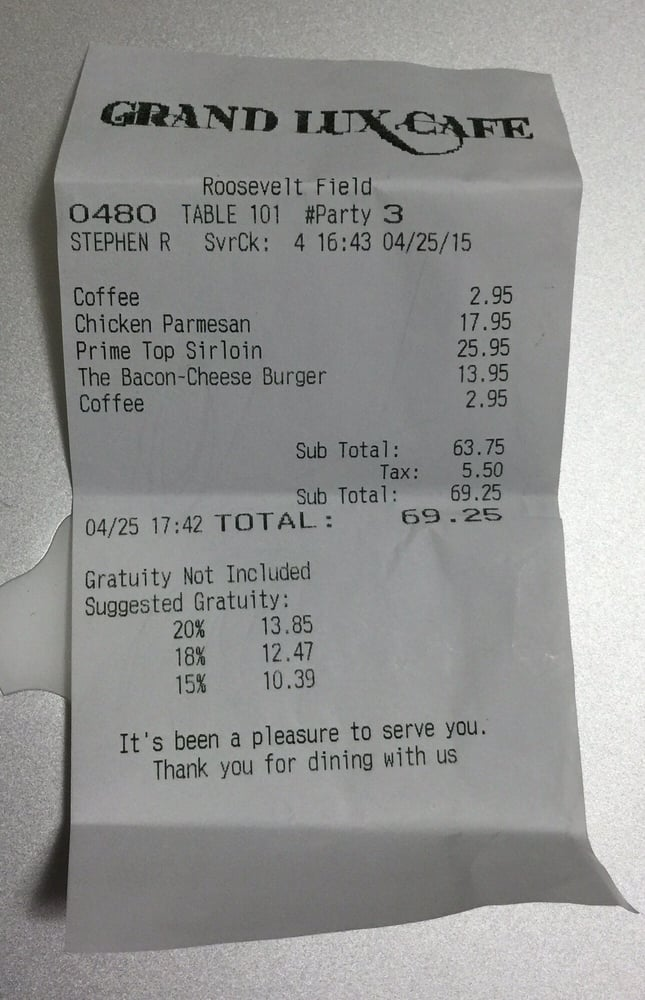

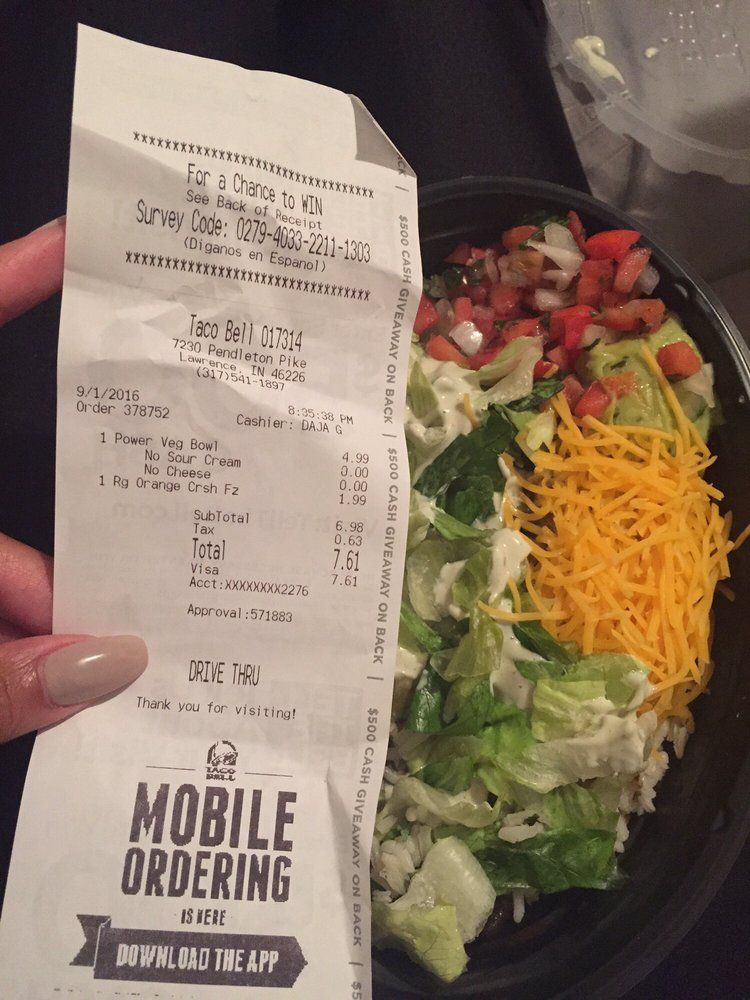

In [42]:
# Display multiple images
for file_num in range(1000, 1003):
  image_name=f'ExpressExpenseImage/{file_num}-receipt.jpg'
  image = Image(filename=image_name)
  display(image)

In [59]:
# Helper functions
def VALUES(texts):
  value_id, value_text = [], []
  for row in range(len(texts)):
    word = texts[row]["text"]
    if re.match(r'.total.|^total|totl|ttl|$due|$total|drv\sthru', word, re.I):
      value_id.append(texts[row]["word_id"])
      value_text.append(word)
      top = texts[row]['bbox'][1]
      for i in range(1,3):
        top_next = texts[row+i]['bbox'][1]
        if abs((top-top_next)/top_next*100) < 4:
          value_id.append(texts[row+i]["word_id"])
          value_text.append(texts[row+i]["text"])
        else:
          print(value_id, value_text) # TBD
          return value_id, value_text
  if value_id == []:
    print(f"Cannot find 'Total' in {image_name}")

  return value_id, value_text

In [61]:
for file_num in range(1000, 1011):
  image_name=f'ExpressExpenseImage/{file_num}-receipt.jpg'

  # Use Tesseract to localize each area of text in the input image
  receipt = pytesseract.image_to_data(image_name, lang='eng', config='--psm 11')#custom_config

  # Split texts into rows
  rows = receipt.split('\n')
  # Count number of rows in the text
  num_of_rows = len(rows)
  # Declare texts List to store text information
  texts = []

  # Get all the texts of the receipt
  for r in range(1, num_of_rows-1):
    # Declare words dictionary
    words = dict()
    # Split words in each row
    splitted_row = rows[r].split('\t')
    # Set id for each word
    words['word_id'] = r
    # Get bounding box coordinates
    words['bbox'] = tuple([int(splitted_row[6]), int(splitted_row[7]),    # left and top
                          int(splitted_row[6]) + int(splitted_row[8]),   # right = left + width
                          int(splitted_row[7]) + int(splitted_row[9])])  # bottom = top + height
    
    # Get word from each word_id
    if len(splitted_row) < 12:
      words['text'] = ''
    else:
      words['text'] = splitted_row[11]
    
    # Write to texts List only if there is a word in that word_id
    if words['text']:
      texts.append(words)

  ### Combine all the necessary information into a dictionary

  # Declare document Dictionary
  doc = {}
  # Add extracted texts in the document Dictionary
  doc.update({'text_boxes': texts})

  # Declare classes and fields Lists
  classes = ['O', 'TTL']
  fields = []
  for cl in classes:
    if cl == 'TTL':
      value_id, value_text = VALUES(texts)
      # Define fields
      new_field = {"field_name": cl, "value_id": value_id, "value_text": value_text, "key_id": [], "key_text": []}
      fields.append(new_field)

  # Add fields and global_attributes in the document Dictionary
  doc.update({'fileds': fields})
  doc.update({"global_attributes":{"file_id": basename(image_name)}})

  # Serialize the document Dictionary into json format
  json_obj = json.dumps(doc, indent = 4, ensure_ascii=False)
  import sys
  # # Save the json file
  # sys.stdout.write(json_obj)

[118, 122] ['TOTAL:', '51.90']
Cannot find 'Total' in ExpressExpenseImage/1001-receipt.jpg
[165, 169] ['Total', 'VP']
Cannot find 'Total' in ExpressExpenseImage/1003-receipt.jpg
[110, 114] ['TOTAL.', '$15.03']
[143, 147] ['Total', '179,94']
Cannot find 'Total' in ExpressExpenseImage/1006-receipt.jpg
[199, 203] ['Total', '$143.71']
[109, 110] ['TOTAL:', '$24.47']
[171] ['Total']


In [62]:
image_name=f'ExpressExpenseImage/1001-receipt.jpg'

# Use Tesseract to localize each area of text in the input image
receipt = pytesseract.image_to_data(image_name, lang='eng', config='--psm 11')#custom_config

# Split texts into rows
rows = receipt.split('\n')
# Count number of rows in the text
num_of_rows = len(rows)
# Declare texts List to store text information
texts = []

# Get all the texts of the receipt
for r in range(1, num_of_rows-1):
  # Declare words dictionary
  words = dict()
  # Split words in each row
  splitted_row = rows[r].split('\t')
  # Set id for each word
  words['word_id'] = r
  # Get bounding box coordinates
  words['bbox'] = tuple([int(splitted_row[6]), int(splitted_row[7]),    # left and top
                        int(splitted_row[6]) + int(splitted_row[8]),   # right = left + width
                        int(splitted_row[7]) + int(splitted_row[9])])  # bottom = top + height
  
  # Get word from each word_id
  if len(splitted_row) < 12:
    words['text'] = ''
  else:
    words['text'] = splitted_row[11]
  
  # Write to texts List only if there is a word in that word_id
  if words['text']:
    texts.append(words)